# Descriptive Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

In [2]:
def get_descriptive_stat(data):
    mean = st.mean(data)
    median = st.median(data)
    variance = st.variance(data)
    std_dev = st.stdev(data)

    return mean, median, variance, std_dev

def get_proportion(csdf):
    female_proportion = []
    schools = []

    # loop for every row in the csdf
    for index, row in csdf.iterrows():
        p = row['Female'] / row['Total']
        female_proportion.append(p)
        schools.append(row['School'])

    return female_proportion, schools

def get_graduates(grdf):
    graduates = []
    schools = []

    # loop for every row in the grdf
    for index, row in grdf.iterrows():
        graduates.append(row['gradTotal'])
        schools.append(row['School'])

    return graduates, schools

In [46]:
def draw_boxplot(data, title, ylabel, xlabel, savename):
    plt.boxplot(data)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # plt.show()
    plt.savefig("plots/" + savename + ".png")
    plt.close()

In [53]:
def analyze(df, title, type):
    if type == "proportion":
        df_107_data, df_107_schools = get_proportion(df[df['Year'] == 107])
        df_108_data, df_108_schools = get_proportion(df[df['Year'] == 108])
        df_109_data, df_109_schools = get_proportion(df[df['Year'] == 109])
        df_110_data, df_110_schools = get_proportion(df[df['Year'] == 110])
        df_111_data, df_111_schools = get_proportion(df[df['Year'] == 111])
        df_112_data, df_112_schools = get_proportion(df[df['Year'] == 112])
    elif type == "number":
        df_107_data, df_107_schools = get_graduates(df[df['Year'] == 106])
        df_108_data, df_108_schools = get_graduates(df[df['Year'] == 107])
        df_109_data, df_109_schools = get_graduates(df[df['Year'] == 108])
        df_110_data, df_110_schools = get_graduates(df[df['Year'] == 109])
        df_111_data, df_111_schools = get_graduates(df[df['Year'] == 110])
        df_112_data, df_112_schools = get_graduates(df[df['Year'] == 111])

    df_107_mean, df_107_median, df_107_std, df_107_var = get_descriptive_stat(df_107_data)
    df_108_mean, df_108_median, df_108_std, df_108_var = get_descriptive_stat(df_108_data)
    df_109_mean, df_109_median, df_109_std, df_109_var = get_descriptive_stat(df_109_data)
    df_110_mean, df_110_median, df_110_std, df_110_var = get_descriptive_stat(df_110_data)
    df_111_mean, df_111_median, df_111_std, df_111_var = get_descriptive_stat(df_111_data)
    df_112_mean, df_112_median, df_112_std, df_112_var = get_descriptive_stat(df_112_data)

    print("Descriptive statistics for", title)
    print(f"Data points: {len(df_107_data)}; {len(df_112_data)}")
    print(f"Mean: {df_107_mean}; {df_112_mean}")
    print(f"Median: {df_107_median}; {df_112_median}")
    print(f"Standard Deviation: {df_107_std}; {df_112_std}")
    print(f"Variance: {df_107_var}; {df_112_var}")

    means = [df_107_mean, df_108_mean, df_109_mean, df_110_mean, df_111_mean, df_112_mean]
    medians = [df_107_median, df_108_median, df_109_median, df_110_median, df_111_median, df_112_median]

    # draw boxplot for 107-112
    if type == "proportion":
        draw_boxplot(df_107_data, "sex ratio: " + title + " in 107", "Proportion", "School", "sex_ratio_107_" + title)
        draw_boxplot(df_112_data, "sex ratio: " + title + " in 112", "Proportion", "School", "sex_ratio_112_" + title)
    elif type == "number":
        draw_boxplot(df_107_data, "Graduated master students: " + title + " in 107", "Number of Graduates", "School", "graduates_107_" + title)
        draw_boxplot(df_112_data, "Graduated master students: " + title + " in 112", "Number of Graduates", "School", "graduates_112_" + title)

    return means, medians

## 1. How the proportion of women studying in Computer Science changes along the time?

In [23]:
csdf = pd.read_csv('data/cs_students.csv')
csdf.head()

,Year,School,Total,Male,Female,Type,Ownership
0,107,國立清華大學,584,445,139,General,Public
1,107,國立臺灣大學,554,485,69,General,Public
2,107,國立臺灣師範大學,201,161,40,General,Public
3,107,國立成功大學,478,364,114,General,Public
4,107,國立交通大學,781,629,152,General,Public


In [24]:
print(csdf.describe())
print("Total number of row: ", len(csdf))

             Year        Total        Male      Female
count  397.000000   397.000000  397.000000  397.000000
mean   109.476071   343.012594  284.982368   58.030227
std      1.709320   188.783031  152.137356   47.516548
min    107.000000     1.000000    1.000000    0.000000
25%    108.000000   201.000000  161.000000   21.000000
50%    109.000000   301.000000  267.000000   44.000000
75%    111.000000   463.000000  383.000000   82.000000
max    112.000000  1043.000000  828.000000  247.000000
Total number of row:  397


In [38]:
# 4 categories: (General, Public), (General, Private), (Tech, Public), (Tech, Private)
GenPub = csdf[(csdf['Type'] == 'General') & (csdf['Ownership'] == "Public")]
GenPri = csdf[(csdf['Type'] == 'General') & (csdf['Ownership'] == "Private")]
TecPub = csdf[(csdf['Type'] == 'Tech') & (csdf['Ownership'] == "Public")]
TecPri = csdf[(csdf['Type'] == 'Tech') & (csdf['Ownership'] == "Private")]

In [54]:
# General Public
GenPub_means, GenPub_medians = analyze(GenPub, "General Public", "proportion")

Descriptive statistics for General Public
Data points: 22; 23
Mean: 0.18806324212459574; 0.22024074892477066
Median: 0.19681362712684974; 0.2135678391959799
Standard Deviation: 0.001485659178429165; 0.002115965281150965
Variance: 0.03854424961559331; 0.04599962261965814


In [55]:
# General Private
GenPri_means, GenPri_medians = analyze(GenPri, "General Private", "proportion")

Descriptive statistics for General Private
Data points: 18; 18
Mean: 0.16819386337942305; 0.2137903534088632
Median: 0.16357540402515097; 0.20258307210031348
Standard Deviation: 0.002926656880363687; 0.004083420468809288
Variance: 0.05409858482773544; 0.06390164683957127


In [56]:
# Tech Public
TecPub_means, TecPub_medians = analyze(TecPub, "Tech Public", "proportion")

Descriptive statistics for Tech Public
Data points: 7; 8
Mean: 0.09430542486580698; 0.11693152361531407
Median: 0.09322033898305085; 0.12057165861513687
Standard Deviation: 0.0007151961095923401; 0.0010555123119262264
Variance: 0.026743150704289502; 0.032488648970467


In [57]:
# Tech Private
TecPri_means, TecPri_medians = analyze(TecPri, "Tech Private", "proportion")

Descriptive statistics for Tech Private
Data points: 20; 16
Mean: 0.0602535580210865; 0.091619651103692
Median: 0.054215234480889135; 0.09104010025062656
Standard Deviation: 0.0010428258577513613; 0.0012123161144993078
Variance: 0.032292814336185714; 0.03481833015093211


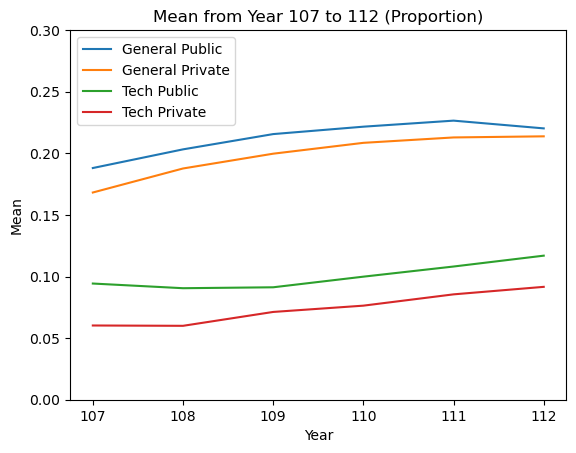

In [60]:
# plot with all means
y = [107, 108, 109, 110, 111, 112]
plt.plot(y, GenPub_means, label='General Public')
plt.plot(y, GenPri_means, label='General Private')
plt.plot(y, TecPub_means, label='Tech Public')
plt.plot(y, TecPri_means, label='Tech Private')
plt.ylim(0, 0.3)
plt.title("Mean from Year 107 to 112 (Proportion)")
plt.xlabel('Year')
plt.ylabel('Mean')
plt.legend()
plt.savefig("plots/mean_proportion.png")
plt.show()

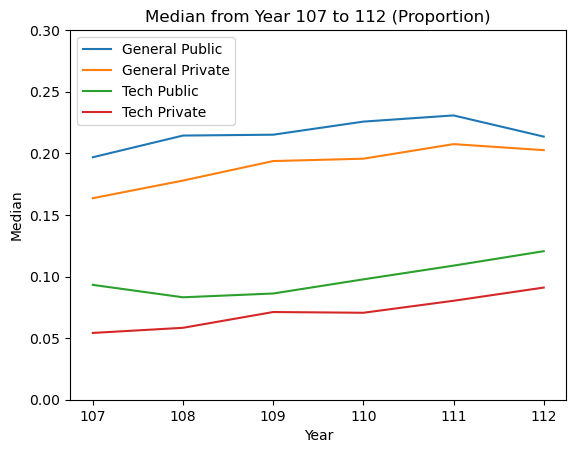

In [61]:
# plot with all medians
y = [107, 108, 109, 110, 111, 112]
plt.plot(y, GenPub_medians, label='General Public')
plt.plot(y, GenPri_medians, label='General Private')
plt.plot(y, TecPub_medians, label='Tech Public')
plt.plot(y, TecPri_medians, label='Tech Private')
plt.ylim(0, 0.3)
plt.title("Median from Year 107 to 112 (Proportion)")
plt.xlabel('Year')
plt.ylabel('Median')
plt.legend()
plt.savefig("plots/median_proportion.png")
plt.show()


## 2. How the number of graduated master students changes along the time?

In [13]:
grdf = pd.read_csv('data/graduates.csv')
grdf.head()

,Year,School,gradTotal,Type,Ownership
0,106,世新大學,202,General,Private
1,106,中信金融管理學院,14,General,Private
2,106,中原大學,610,General,Private
3,106,中國文化大學,298,General,Private
4,106,中國科技大學,47,Tech,Private


In [62]:
GenPub_gr = grdf[(grdf['Type'] == 'General') & (grdf['Ownership'] == "Public")]
GenPri_gr = grdf[(grdf['Type'] == 'General') & (grdf['Ownership'] == "Private")]
TecPub_gr = grdf[(grdf['Type'] == 'Tech') & (grdf['Ownership'] == "Public")]
TecPri_gr = grdf[(grdf['Type'] == 'Tech') & (grdf['Ownership'] == "Private")]

In [63]:
# General Public
GenPubg_means, GenPubg_medians = analyze(GenPub_gr, "General Public", "number")

Descriptive statistics for General Public
Data points: 31; 31
Mean: 703.5806451612904; 720.1290322580645
Median: 301; 295
Standard Deviation: 682814.1849462365; 746502.9161290323
Variance: 826.3257135937599; 864.004002380216


In [64]:
# General Private
GenPrig_means, GenPrig_medians = analyze(GenPri_gr, "General Private", "number")

Descriptive statistics for General Private
Data points: 37; 36
Mean: 216; 196.22222222222223
Median: 185; 152.0
Standard Deviation: 32978.055555555555; 29788.292063492063
Variance: 181.5986111057999; 172.59285055729296


In [65]:
# Tech Public
TecPubg_means, TecPubg_medians = analyze(TecPub_gr, "Tech Public", "number")

Descriptive statistics for Tech Public
Data points: 12; 12
Mean: 474.0833333333333; 511.6666666666667
Median: 312.0; 329.5
Standard Deviation: 222293.35606060605; 266912.9696969697
Variance: 471.47996358340197; 516.6362063357249


In [66]:
# Tech Private
TecPrig_means, TecPrig_medians = analyze(TecPri_gr, "Tech Private", "number")

Descriptive statistics for Tech Private
Data points: 54; 49
Mean: 55.96296296296296; 50.89795918367347
Median: 35.0; 34
Standard Deviation: 3495.5457721872817; 2663.593537414966
Variance: 59.123140750363405; 51.610013925738926


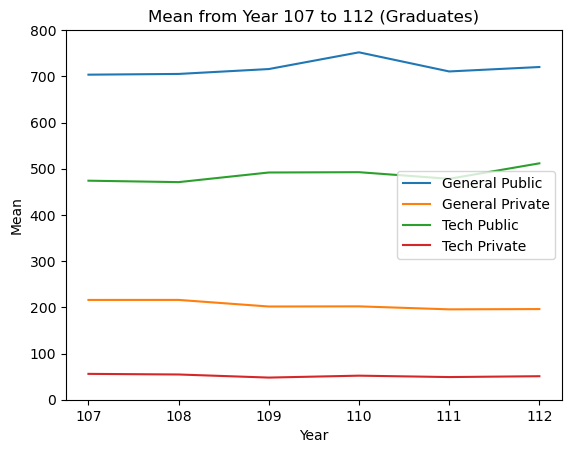

In [67]:
# plot with all means
y = [107, 108, 109, 110, 111, 112]
plt.plot(y, GenPubg_means, label='General Public')
plt.plot(y, GenPrig_means, label='General Private')
plt.plot(y, TecPubg_means, label='Tech Public')
plt.plot(y, TecPrig_means, label='Tech Private')
plt.ylim(0, 800)
plt.title("Mean from Year 107 to 112 (Graduates)")
plt.xlabel('Year')
plt.ylabel('Mean')
plt.legend()
plt.savefig("plots/mean_graduates.png")
plt.show()

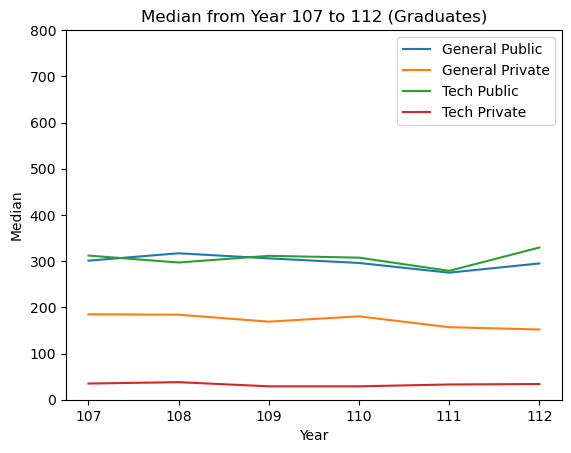

In [68]:
# plot with all medians
y = [107, 108, 109, 110, 111, 112]
plt.plot(y, GenPubg_medians, label='General Public')
plt.plot(y, GenPrig_medians, label='General Private')
plt.plot(y, TecPubg_medians, label='Tech Public')
plt.plot(y, TecPrig_medians, label='Tech Private')
plt.ylim(0, 800)
plt.title("Median from Year 107 to 112 (Graduates)")
plt.xlabel('Year')
plt.ylabel('Median')
plt.legend()
plt.savefig("plots/median_graduates.png")
plt.show()